# 窃漏电分析

## 导入常用库

In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## 读取数据

In [48]:
data = pd.read_csv('res/data0.csv',encoding='gb2312')       # 由于数据集的编码方式为gb2312，read_csv方法默认编码方式utf-8
data.columns= ['Power trend decreases','line loss','warning','label']
data.head()

,Power trend decreases,line loss,warning,label
0,4.0,1.0,1.0,1.0
1,4.0,0.0,4.0,1.0
2,2.0,1.0,1.0,1.0
3,9.0,0.0,0.0,0.0
4,3.0,1.0,0.0,0.0


## 数据预处理

### 清除空值

In [49]:
data.dropna(axis=0,inplace=True)        # 行中有空值，则删除行
isna_sum = data.isna().sum()
isna_sum

Power trend decreases    0
line loss                0
warning                  0
label                    0
dtype: int64

## 数据可视化

### 将数据转换位ndarray类型

In [87]:
data_columns = np.array(data.columns)
data_features = np.array(data[data_columns[:len(data_columns)-1]])       # 获取特征
data_label = np.array(data[data_columns[-1]].astype('int'))              # 获取标签
data_label_names = ['un steal','steal']
print('features[0:5]: ',data_features[0:5])
print('label[0:5]: ',data_label[0:5])

features[0:5]:  [[4. 1. 1.]
 [4. 0. 4.]
 [2. 1. 1.]
 [9. 0. 0.]
 [3. 1. 0.]]
label[0:5]:  [1 1 1 0 0]


### 窃电比例

[251, 40]


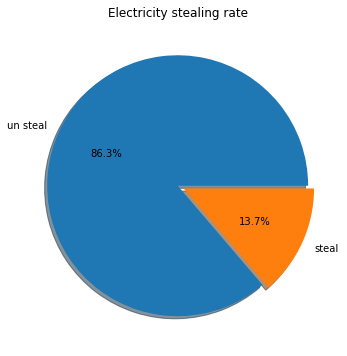

In [88]:
x = [len(data_label)-data_label.sum(),data_label.sum()]
print(x)

plt.figure(figsize=(6,6))
plt.title('Electricity stealing rate')
plt.pie(x=x,autopct="%1.1f%%",shadow=True,explode=[0,0.05],labels=data_label_names)
plt.show()

### 各特征之间的关系

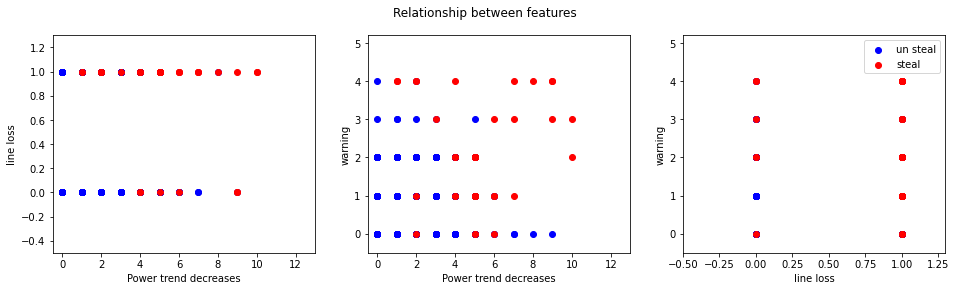

In [91]:
combination = [[0,1],[0,2],[1,2]]       # 各特征之间的组合
plt.figure(figsize=(16,4))
pos = 1
color = 'br'
for index in combination:
    x = data_features[...,index[0]]
    y = data_features[...,index[1]]
    ax = plt.subplot(1,3,pos)
    pos+=1
    plt.xlabel(data_columns[index[0]])
    plt.ylabel(data_columns[index[1]])
    # 调整xy轴的范围
    plt.xlim(x.min()-0.5,x.max()*1.3)
    plt.ylim(y.min()-0.5,y.max()*1.3)
    for i,c in zip(range(2),color):
        idx = np.where(data_label==i)
        ax.scatter(x=data_features[idx,index[0]],y=data_features[idx,index[1]],c=c,cmap=plt.cm.RdYlBu,label=data_label_names[i])
plt.suptitle('Relationship between features')
plt.legend(loc='best')
plt.show()

### 特征与标签之间的关系

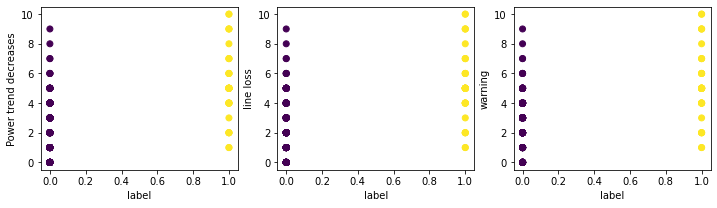

In [119]:
pos = 1
plt.figure(figsize=(12,3))
for i in range(3):
    x = data_label
    y = data_features[:,0]
    ax = plt.subplot(1,3,pos)
    pos+=1
    plt.xlabel(data_columns[-1])
    plt.ylabel(data_columns[i])
    ax.scatter(x,y,c=x)

## 训练模型

### 数据分成测试集和训练集

In [103]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt

X_train,X_test,y_train,y_test = train_test_split(data_features,data_label,test_size=0.5,random_state=5)

### svm

In [107]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('SVC score = ',score)

SVC score =  0.9246575342465754
SVR score =  0.9246575342465754


f:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


### KNeighborsClassifier

In [109]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('KNeighborsClassifier score = ',score)

KNeighborsClassifier score =  0.910958904109589


### DecisionTreeClassifier

In [110]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('DecisionTreeClassifier score = ',score)

DecisionTreeClassifier score =  0.8972602739726028


### RandomForestClassifier 和 GradientBoostingClassifier

In [112]:
from sklearn import ensemble

clf = ensemble.RandomForestClassifier()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('RandomForestClassifier score = ',score)

clf = ensemble.GradientBoostingClassifier()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('GradientBoostingClassifier score = ',score)

RandomForestClassifier score =  0.9178082191780822
GradientBoostingClassifier score =  0.910958904109589


### GaussianNB 、 MultinomialNB 、 BernoulliNB 和 CategoricalNB

In [118]:
from sklearn import naive_bayes

clf = naive_bayes.GaussianNB()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('GaussianNB score = ',score)

clf = naive_bayes.MultinomialNB()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('MultinomialNB score = ',score)

clf = naive_bayes.BernoulliNB()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('BernoulliNB score = ',score)

clf = naive_bayes.CategoricalNB()
clf.fit(X=X_train,y=y_train)
y_pred = clf.predict(X=X_test)
score = mt.accuracy_score(y_true=y_test,y_pred=y_pred)
print('CategoricalNB score = ',score)

GaussianNB score =  0.910958904109589
MultinomialNB score =  0.8835616438356164
BernoulliNB score =  0.8835616438356164
CategoricalNB score =  0.9178082191780822
